#        Politics and Statistics 
###        Submitted by Saeed Manavipour






In [27]:
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.regression import linear_model
import statsmodels.api as sm
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.datasets import make_blobs



#********************         Part 1        ***************
#********************                       ***************

#loading the data for each data frame:
df1 = pd.read_csv("~/downloads/data/data.csv")
df2 = pd.read_csv("~/downloads/data/votes.csv")
df3 = pd.read_csv("~/downloads/data/ec.csv")


Populating the interactive namespace from numpy and matplotlib


C:\Users\saeed\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
#first all the redundant and duplicate columns for race need to be removed:


del df1['Latino Population']
del df1['White (Not Latino) Population']
del df1['African American Population']
del df1['Native American Population']
del df1['Asian American Population']
del df1['Other Race or Races']
del df1['White_Asian']

df1.columns

Index(['State', 'ST', 'Fips', 'County', 'Precincts', 'Votes',
       'Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'Graduate Degree', 'School Enrollment',
       'Median Earnings 2010', 'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Low.birthweight', 'Teen.births',

In [29]:
#merging the data frames:
df_merged = pd.merge(df1,df2,on='Fips' )
df_merged = pd.merge(df_merged,df3,on='State' )
#df_merged.columns
df_merged.shape

(3141, 54)

In [30]:
# chaning column names to make them more readable:
df_merged.rename(columns={'Democrats 08 (Votes)': 'Dem08'}, inplace=True)
df_merged.rename(columns={'Democrats 12 (Votes)': 'Dem12'}, inplace=True)
df_merged.rename(columns={'Republicans 08 (Votes)': 'Rep08'}, inplace=True)
df_merged.rename(columns={'Republicans 12 (Votes)': 'Rep12'}, inplace=True)
df_merged.rename(columns={'votes16_trumpd': 'Trump2016'}, inplace=True)
df_merged.rename(columns={'votes16_clintonh': 'Clinton2016'}, inplace=True)
df_merged.columns


Index(['State', 'ST', 'Fips', 'County', 'Precincts', 'Votes',
       'Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'Graduate Degree', 'School Enrollment',
       'Median Earnings 2010', 'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Low.birthweight', 'Teen.births',

In [31]:
#to make it easier we rename out data frame
df=df_merged


In [32]:
#Question: Next augment the data so that each county contains the relative vote count 
#for each party in each election

#the following columns show the relative vote for each county and each election: 
#rel_vote_dem08','rel_vote_rep08', 'rel_vote_dem12', 'rel_vote_rep12', 'rel_vote_dem16',
#'rel_vote_rep16'],


df['rel_vote_dem08'] = (df['Dem08']/ (df['Dem08']+df['Rep08'] )   )
df['rel_vote_rep08'] = (df['Rep08']/ (df['Dem08']+df['Rep08'] )   )

df['rel_vote_dem12'] = (df['Dem12']/ (df['Dem12']+df['Rep12'] )   )
df['rel_vote_rep12'] = (df['Rep12']/ (df['Dem12']+df['Rep12'] )   )

df['rel_vote_dem16'] = (df['Clinton2016']/ (df['Clinton2016']+df['Trump2016'] )   )
df['rel_vote_rep16'] = (df['Trump2016']/ (df['Clinton2016']+df['Trump2016'] )   )




In [33]:
# removing columns with more than 100 nulls

df.isnull().sum()
del df['Violent.crime']
del df['Homicide.rate']
del df['Injury.deaths']
del df['Infant.mortality']
del df['Sexually.transmitted.infections']
del df['HIV.prevalence.rate']
del df['Teen.births']
del df['Adult.smoking']
del df['Low.birthweight']


In [34]:
#looking at the dataframe we can see that vote data for Alaska are missing so we remove 
#all the rows for Alaska 

#df.shape
df=df.dropna()
df.shape

(3102, 51)

In [35]:
# checking the columns shows that we have all the necessary columns we need
df.columns

Index(['State', 'ST', 'Fips', 'County', 'Precincts', 'Votes',
       'Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'Graduate Degree', 'School Enrollment',
       'Median Earnings 2010', 'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Children.in.single.parent.househ

[[1.         0.16737297]
 [0.16737297 1.        ]]
[[1.         0.20738478]
 [0.20738478 1.        ]]
[[1.       0.324018]
 [0.324018 1.      ]]


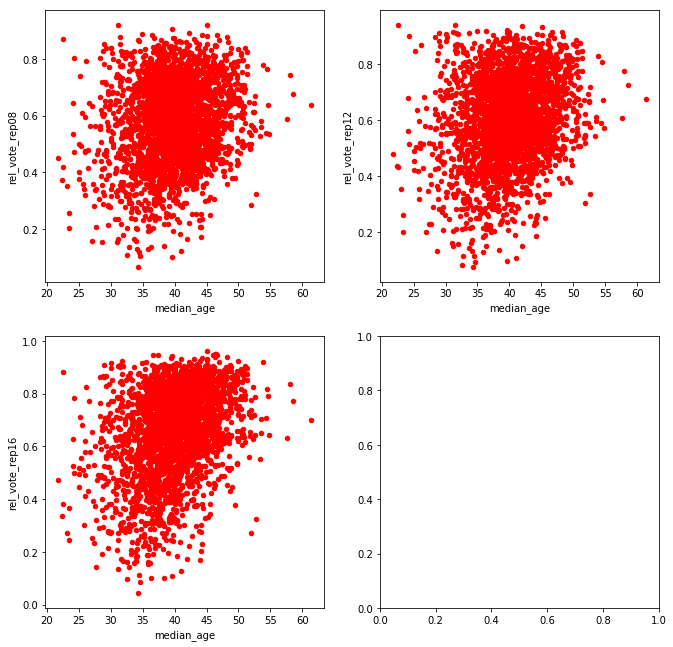

In [36]:
#********************         Part 2        ***************
#********************                       ***************

# 1.What data columns are correlated with the Republican vote share (and which are not). 
#Does this pattern appear in all three elections we have data for?

#looking at the following graphs and information it seems that median age is positively correlated with republican 
#share and even growing every election: from 0.16 to 0.2 and then to 0.32
#fig, axes = plt.subplots(nrows=2, ncols=2)
plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)

df.plot.scatter(x='median_age', y='rel_vote_rep08', c='red',ax=axes[0,0]);
df.plot.scatter(x='median_age', y='rel_vote_rep12', c='red',ax=axes[0,1]);
df.plot.scatter(x='median_age', y='rel_vote_rep16', c='red',ax=axes[1,0]);

print(np.corrcoef(df['median_age'],df['rel_vote_rep08']))
print(np.corrcoef(df['median_age'],df['rel_vote_rep12']))
print(np.corrcoef(df['median_age'],df['rel_vote_rep16']))



[[1.         0.34831738]
 [0.34831738 1.        ]]
[[1.         0.35173147]
 [0.35173147 1.        ]]
[[1.        0.3710116]
 [0.3710116 1.       ]]


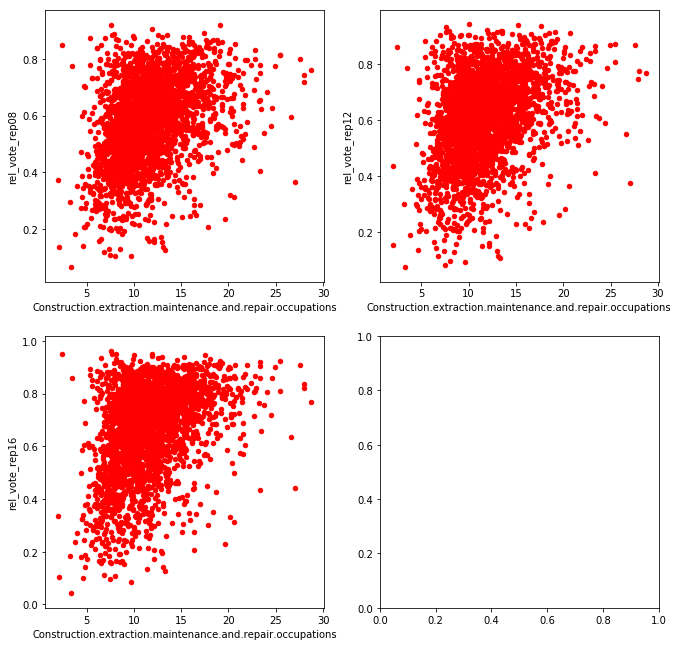

In [37]:
#looking at construction workers it seems that there is positive correlation with republican vote
#the correlation grows each election cycle

plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)
x='Construction.extraction.maintenance.and.repair.occupations'
df.plot.scatter(x, y='rel_vote_rep08',  c='red',ax=axes[0,0]);
df.plot.scatter(x, y='rel_vote_rep12',  c='red',ax=axes[0,1]);
df.plot.scatter(x, y='rel_vote_rep16',  c='red',ax=axes[1,0]);
print(np.corrcoef(df['Construction.extraction.maintenance.and.repair.occupations'],df['rel_vote_rep08']))
print(np.corrcoef(df['Construction.extraction.maintenance.and.repair.occupations'],df['rel_vote_rep12']))
print(np.corrcoef(df['Construction.extraction.maintenance.and.repair.occupations'],df['rel_vote_rep16']))



[[ 1.         -0.36900119]
 [-0.36900119  1.        ]]
[[ 1.         -0.37113957]
 [-0.37113957  1.        ]]
[[ 1.         -0.51870584]
 [-0.51870584  1.        ]]


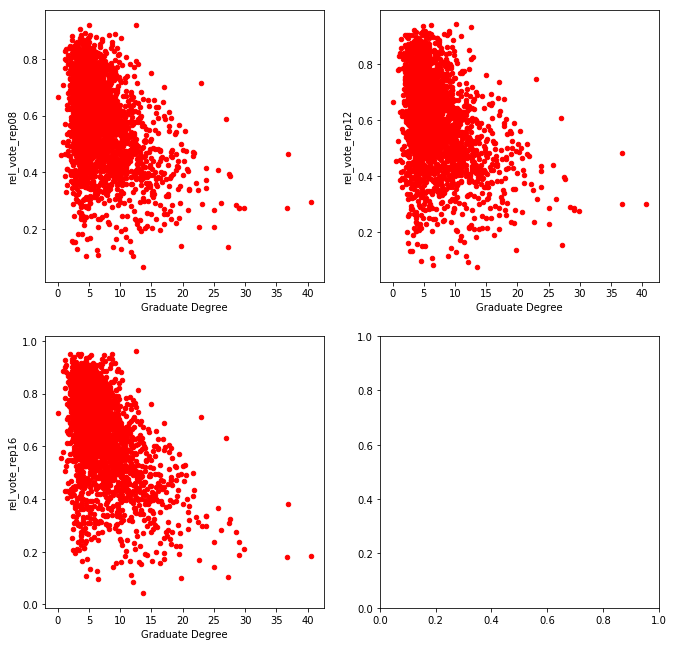

In [38]:
#the level of higher education seems to be negatively correlated with republican vote share
# this is easily observed in 2016 when the correlation is -0.518
plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)

df.plot.scatter(x='Graduate Degree', y='rel_vote_rep08',  c='red',ax=axes[0,0]);
df.plot.scatter(x='Graduate Degree', y='rel_vote_rep12',  c='red',ax=axes[0,1]);
df.plot.scatter(x='Graduate Degree', y='rel_vote_rep16',  c='red',ax=axes[1,0]);
print(np.corrcoef(df['Graduate Degree'],df['rel_vote_rep08']))
print(np.corrcoef(df['Graduate Degree'],df['rel_vote_rep12']))
print(np.corrcoef(df['Graduate Degree'],df['rel_vote_rep16']))

[[1.         0.35651706]
 [0.35651706 1.        ]]
[[1.         0.44560863]
 [0.44560863 1.        ]]
[[1.         0.56820185]
 [0.56820185 1.        ]]


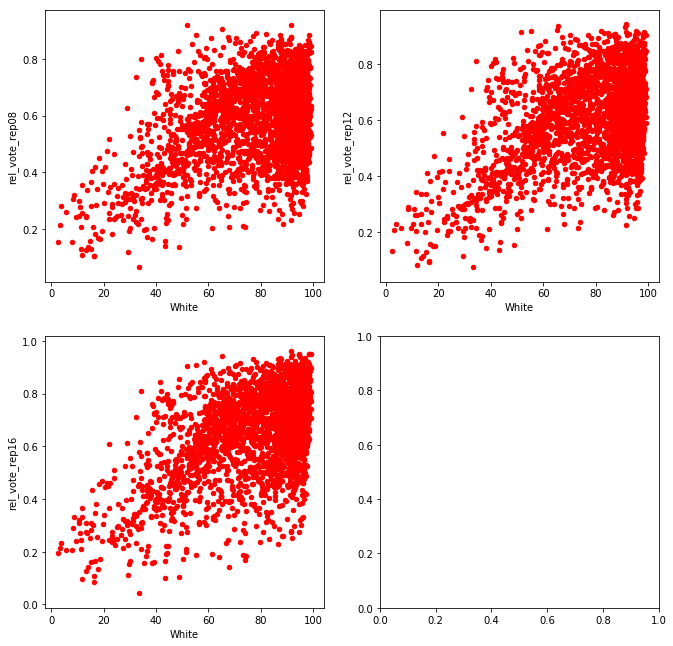

In [39]:
#2.	How are the racial demographics correlated with Republican vote share? 
#Is there any race which is consistently correlated with Democratic (or Republican) vote share?

#looking at the white vs republican vote shows a positive correlation that is growing with each election
#from 0.35 to 0.44 to 0.56
plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)

df.plot.scatter(x='White', y='rel_vote_rep08',  c='red', ax=axes[0,0]);
df.plot.scatter(x='White', y='rel_vote_rep12',  c='red',ax=axes[0,1]);
df.plot.scatter(x='White', y='rel_vote_rep16',  c='red',ax=axes[1,0]);
print(np.corrcoef(df['White'],df['rel_vote_rep08']))
print(np.corrcoef(df['White'],df['rel_vote_rep12']))
print(np.corrcoef(df['White'],df['rel_vote_rep16']))



[[ 1.         -0.31262921]
 [-0.31262921  1.        ]]
[[ 1.        -0.3942097]
 [-0.3942097  1.       ]]
[[ 1.         -0.46151446]
 [-0.46151446  1.        ]]


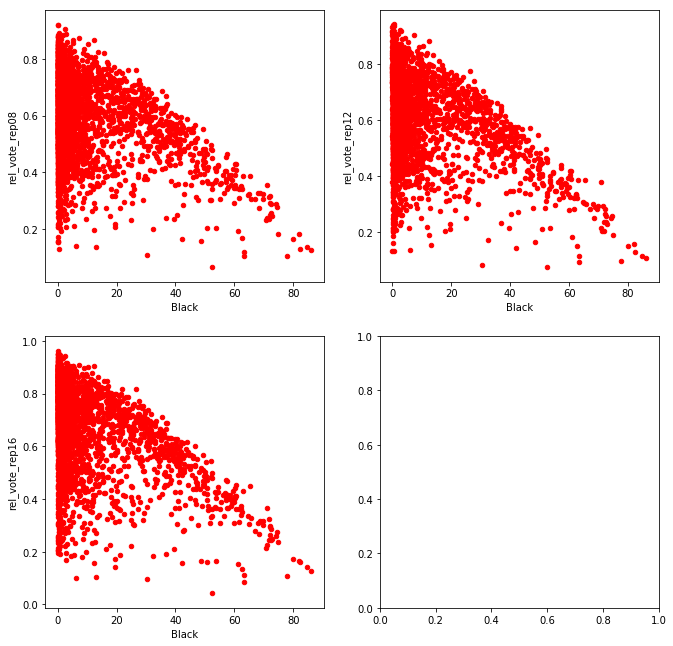

In [40]:
#looking at Black versus republican, shows that counties with larger black population voted less for republican part 
#and the negative correlation is growing with time 
plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)

df.plot.scatter(x='Black', y='rel_vote_rep08',  c='red',ax=axes[0,0]);
df.plot.scatter(x='Black', y='rel_vote_rep12',  c='red',ax=axes[0,1]);
df.plot.scatter(x='Black', y='rel_vote_rep16',  c='red',ax=axes[1,0]);
print(np.corrcoef(df['Black'],df['rel_vote_rep08']))
print(np.corrcoef(df['Black'],df['rel_vote_rep12']))
print(np.corrcoef(df['Black'],df['rel_vote_rep16']))

[[1.         0.31262921]
 [0.31262921 1.        ]]
[[1.        0.3942097]
 [0.3942097 1.       ]]
[[1.         0.46151446]
 [0.46151446 1.        ]]


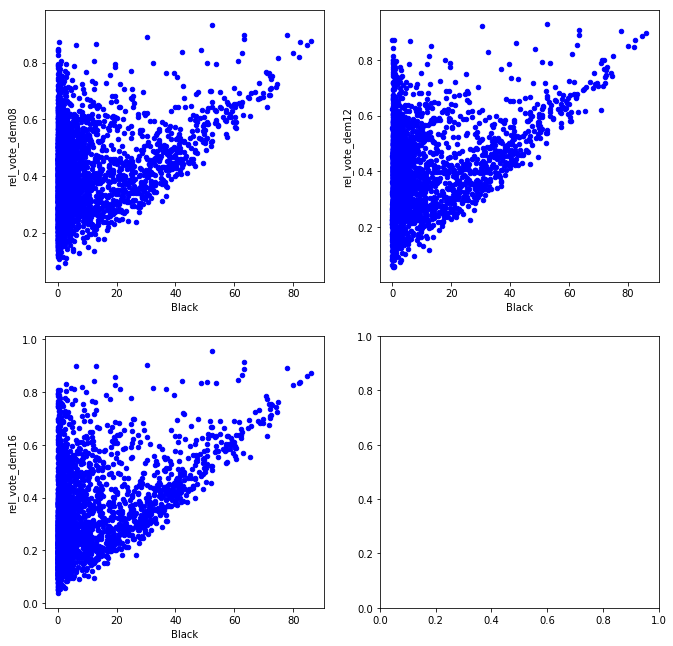

In [41]:
# looking at black vs democrat vote share, shows a positive correlation that is growing with each election
plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)

df.plot.scatter(x='Black', y='rel_vote_dem08',  c='blue',ax=axes[0,0]);
df.plot.scatter(x='Black', y='rel_vote_dem12',  c='blue',ax=axes[0,1]);
df.plot.scatter(x='Black', y='rel_vote_dem16',  c='blue',ax=axes[1,0]);
print(np.corrcoef(df['Black'],df['rel_vote_dem08']))
print(np.corrcoef(df['Black'],df['rel_vote_dem12']))
print(np.corrcoef(df['Black'],df['rel_vote_dem16']))

[[1.         0.10696465]
 [0.10696465 1.        ]]
[[1.         0.12240924]
 [0.12240924 1.        ]]
[[1.        0.1463122]
 [0.1463122 1.       ]]


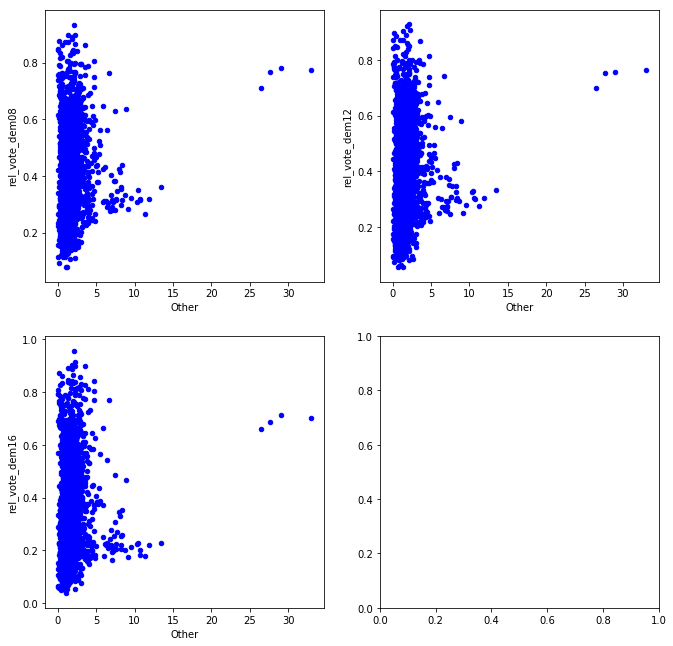

In [42]:
# looking at Other races vs dem share does not show any concrete correlation
plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)

df.plot.scatter(x='Other', y='rel_vote_dem08',  c='blue',ax=axes[0,0]);
df.plot.scatter(x='Other', y='rel_vote_dem12',  c='blue',ax=axes[0,1]);
df.plot.scatter(x='Other', y='rel_vote_dem16',  c='blue',ax=axes[1,0]);
print(np.corrcoef(df['Other'],df['rel_vote_dem08']))
print(np.corrcoef(df['Other'],df['rel_vote_dem12']))
print(np.corrcoef(df['Other'],df['rel_vote_dem16']))

[[1.        0.0603067]
 [0.0603067 1.       ]]
[[1.         0.09753971]
 [0.09753971 1.        ]]
[[1.         0.19673859]
 [0.19673859 1.        ]]


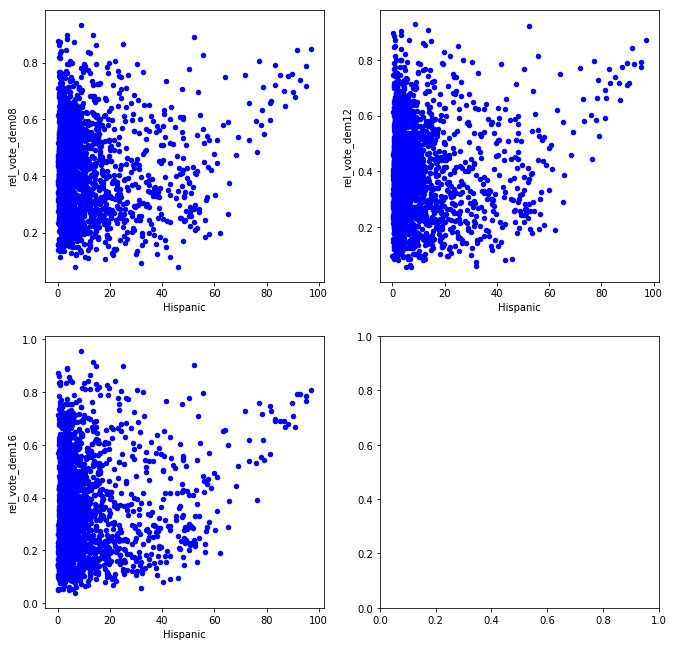

In [43]:
# looking at hispanic counties vs dem share does not show much correlation
plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)

df.plot.scatter(x='Hispanic', y='rel_vote_dem08',  c='blue',ax=axes[0,0]);
df.plot.scatter(x='Hispanic', y='rel_vote_dem12',  c='blue',ax=axes[0,1]);
df.plot.scatter(x='Hispanic', y='rel_vote_dem16',  c='blue',ax=axes[1,0]);
print(np.corrcoef(df['Hispanic'],df['rel_vote_dem08']))
print(np.corrcoef(df['Hispanic'],df['rel_vote_dem12']))
print(np.corrcoef(df['Hispanic'],df['rel_vote_dem16']))

In [12]:
#3.	Does the pattern you found in the last question hold at the state level. That is if you found a particular 
#race was highly correlated with a political party (when examining county level outcomes) does the same pattern 
#hold in every state? Are there certain races which remain positively (or negatively) correlated with a party 
#in each state? Are there races which seem to change between states?





In [44]:
# we need to define a data frame that holds the data at state level:

df_state=df.groupby('State').mean()

In [45]:
df_state.head()

,Fips,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,Children Under 6 Living in Poverty,...,Rep12,Trump2016,Clinton2016,EC_votes,rel_vote_dem08,rel_vote_rep08,rel_vote_dem12,rel_vote_rep12,rel_vote_dem16,rel_vote_rep16
State,,,,,,,,,,,,,,,,,,,,,
Alabama,1067.000000,37.641791,31017.388060,23.217910,76.782090,15.392537,5.622388,74.137313,23934.094229,30.857463,...,18745.149254,19506.343284,10717.671642,9.0,0.385606,0.614394,0.387028,0.612972,0.343349,0.656651
Arizona,4013.866667,97.933333,137520.666667,18.180000,81.820000,18.053333,6.620000,72.963333,25055.380148,28.323333,...,82243.600000,68076.933333,62416.666667,11.0,0.445189,0.554811,0.447648,0.552352,0.442777,0.557223
Arkansas,5074.589041,33.739726,14957.520548,21.090411,78.909589,13.919178,4.427397,73.954110,22135.327554,34.217808,...,8606.561644,8994.547945,5093.054795,6.0,0.380788,0.619212,0.358389,0.641611,0.317646,0.682354
California,6058.000000,428.431034,206108.913793,17.541379,82.458621,24.605172,8.608621,76.245690,29033.092409,20.454310,...,83447.551724,67520.844828,126939.482759,55.0,0.543865,0.456135,0.531915,0.468085,0.537298,0.462702
Colorado,8061.968254,48.238095,40691.000000,12.007937,87.992063,28.300000,9.571429,74.692063,26544.564429,21.019048,...,18807.920635,18049.380952,19237.650794,9.0,0.461409,0.538591,0.439079,0.560921,0.397126,0.602874


[[1.         0.35325917]
 [0.35325917 1.        ]]
[[1.         0.41458556]
 [0.41458556 1.        ]]
[[1.         0.52464776]
 [0.52464776 1.        ]]


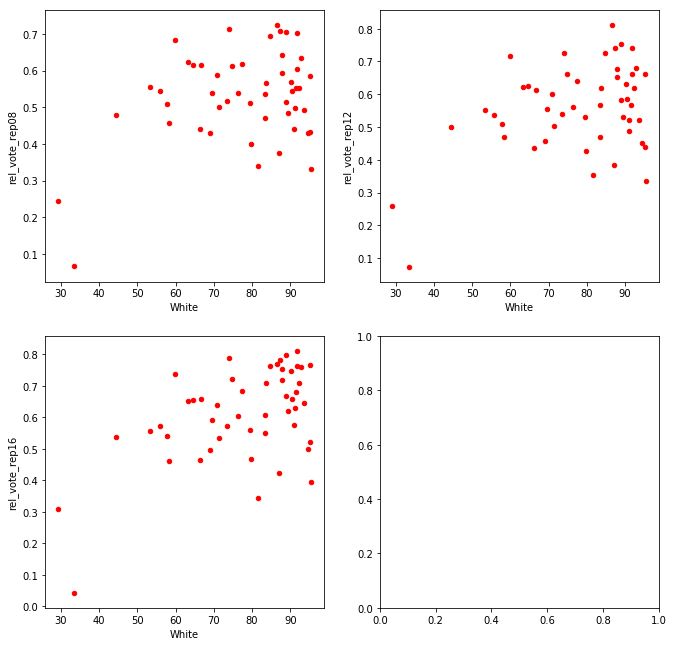

In [46]:
#looking at the white votes for republicans in each state shows positive correlation as before and growing with time
# here we see positive correlation that is growing each election
plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)

df_state.plot.scatter(x='White', y='rel_vote_rep08',  c='red',ax=axes[0,0]);
df_state.plot.scatter(x='White', y='rel_vote_rep12',  c='red',ax=axes[0,1]);
df_state.plot.scatter(x='White', y='rel_vote_rep16',  c='red',ax=axes[1,0]);
print(np.corrcoef(df_state['White'],df_state['rel_vote_rep08']))
print(np.corrcoef(df_state['White'],df_state['rel_vote_rep12']))
print(np.corrcoef(df_state['White'],df_state['rel_vote_rep16']))

[[1.         0.24125968]
 [0.24125968 1.        ]]
[[1.         0.30641428]
 [0.30641428 1.        ]]
[[1.         0.38148599]
 [0.38148599 1.        ]]


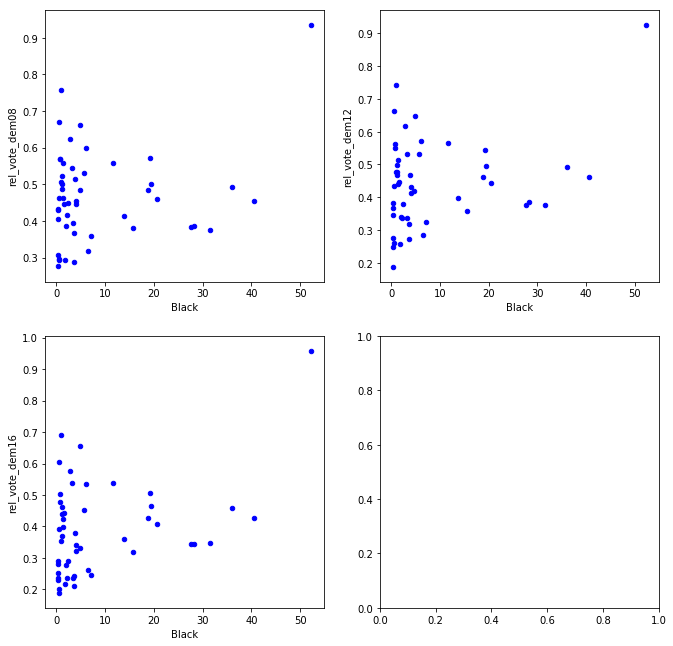

In [24]:
# the black vote for democrats still shows a positive correlation but the coefficients are smaller
plt.rcParams['figure.figsize']=(11,11)
fig, axes = plt.subplots(nrows=2, ncols=2)
df_state.plot.scatter(x='Black', y='rel_vote_dem08',  c='blue',ax=axes[0,0]);
df_state.plot.scatter(x='Black', y='rel_vote_dem12',  c='blue',ax=axes[0,1]);
df_state.plot.scatter(x='Black', y='rel_vote_dem16',  c='blue',ax=axes[1,0]);
print(np.corrcoef(df_state['Black'],df_state['rel_vote_dem08']))
print(np.corrcoef(df_state['Black'],df_state['rel_vote_dem12']))
print(np.corrcoef(df_state['Black'],df_state['rel_vote_dem16']))

In [23]:
# Bonus: You may notice some odd numbers when aggregating data at the state level, try 
# examining the data and explaining this, how would you deal with these issues?

#  when we defined the data frame df_state we used .mean() attribute to get the average data 
# of each column for each state, therefore some numbers such as total population are off 
# because they needed to be summed up,if we needed to analyze the data based on state 
# population we could define a separate data frame using .sum()


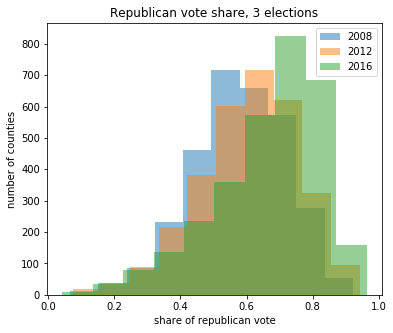

In [47]:
#********************         Part 3        ***************
#********************                       ***************

#At a county level visualize the percentage share of the Republican votes in each election. 
#What visualization method is most appropriate for this task? Note: we are asking for three plots, 
#    one for each election.

#we use histogram to show the results, as we can see the graph is shifting towards right for each election
#the republican party managed to get more share of votes in 2016 compared to 2012 and 2008

plt.rcParams['figure.figsize']=(6,5)
plt.hist(df['rel_vote_rep08'], alpha=0.5, label='2008');
plt.hist(df['rel_vote_rep12'], alpha=0.5, label='2012');
plt.hist(df['rel_vote_rep16'], alpha=0.5, label='2016');
plt.title('Republican vote share, 3 elections');
plt.xlabel('share of republican vote');
plt.ylabel('number of counties');
plt.legend();



In [20]:
#2.	Would you say the three elections are similar to each other? How do you define similarity, given what you 
#saw in part one do you think this is an appropriate measure of similarity?

#the graphs are shifting right meaning that in recent elections bigger share of voters voted republican,
#Also calculating the mean for each election year supports the same conclusion:

print('Average for relative share of republican vote in 2008: ',df['rel_vote_rep08'].mean())
print('Average for relative share of republican vote in 2012: ',df['rel_vote_rep12'].mean())
print('Average for relative share of republican vote in 2016: ',df['rel_vote_rep16'].mean())

Average for relative share of republican vote in 2008:  0.5773001150494405
Average for relative share of republican vote in 2012:  0.607588506551462
Average for relative share of republican vote in 2016:  0.6669174145800288


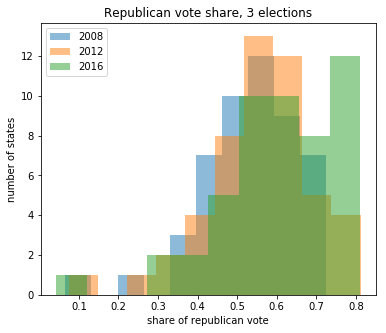

In [47]:
# 3.Repeat this exercise but now aggregate the data at a state level (that is instead of counting the vote 
#share of a party within a county we do it within a state). Did your answer from before change?



plt.rcParams['figure.figsize']=(6,5)
plt.hist(df_state['rel_vote_rep08'], alpha=0.5, label='2008');
plt.hist(df_state['rel_vote_rep12'], alpha=0.5, label='2012');
plt.hist(df_state['rel_vote_rep16'], alpha=0.5, label='2016');
plt.title('Republican vote share, 3 elections');
plt.xlabel('share of republican vote');
plt.ylabel('number of states');
plt.legend();


In [50]:
# Again the graphs are shifting towards right which supports the previous argument that 
#republicans have done a better job at attracting voters in recent elections. the average 
#numbers show the same as well 

print('Average for relative share of republican vote by state in 2008: ',df_state['rel_vote_rep08'].mean())
print('Average for relative share of republican vote by state in 2012: ',df_state['rel_vote_rep12'].mean())
print('Average for relative share of republican vote by state in 2016: ',df_state['rel_vote_rep16'].mean())

Average for relative share of republican vote by state in 2008:  0.5305542777561792
Average for relative share of republican vote by state in 2012:  0.5577351875409139
Average for relative share of republican vote by state in 2016:  0.6102796943780546


In [27]:
#looking at the graphs of residuals can also give us a sense of 
#correlation between these columns:

C:\Users\saeed\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


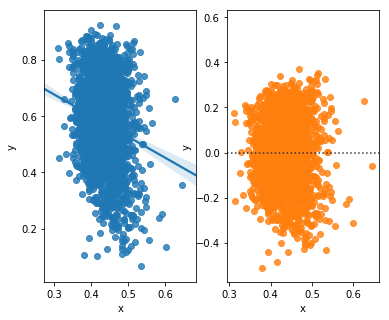

In [69]:
y=df['rel_vote_rep08']
x=df['Gini.Coefficient']
#plt.rcParams['figure.figsize']=(6,5)
fig, ax = plt.subplots(1,2)
sns.regplot('x', 'y', pd.DataFrame({'x':x, 'y':y}), ax = ax[0]);
sns.residplot('x', 'y', pd.DataFrame({'x':x, 'y':y}), ax = ax[1]);

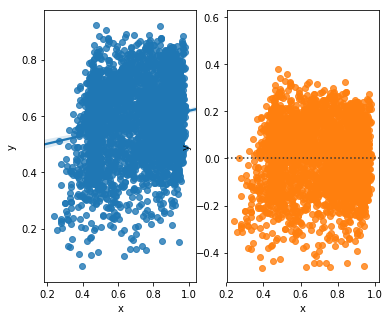

In [70]:
y=df['rel_vote_rep08']
x=df['SIRE_homogeneity']
plt.rcParams['figure.figsize']=(6,5)
fig, ax = plt.subplots(1,2)
sns.regplot('x', 'y', pd.DataFrame({'x':x, 'y':y}), ax = ax[0]);
sns.residplot('x', 'y', pd.DataFrame({'x':x, 'y':y}), ax = ax[1]);

In [28]:
#********************         Part 4        ***************
#********************                       ***************
# Create a model which measures the fraction of votes a party (Republican) gets within a county based on the county 
#data. When building your model keep the following points in mind:
#	What are the data points, and what are the dependent and independent variables.

#the dependent variable is republican share of vote (df['rel_vote_rep16']) and independent variables are other columns
# such as Gini.Coefficient, median_age, income, unemployment...
#based on calculations done in this study it seems that following columns have high correlation with republican vote:


print(np.corrcoef(df_state['Gini.Coefficient'],df_state['rel_vote_rep08']))
print(np.corrcoef(df_state['Unemployment'],df_state['rel_vote_rep08']))
print(np.corrcoef(df_state['Children.in.single.parent.households'],df_state['rel_vote_rep08']))
print(np.corrcoef(df_state['SIRE_homogeneity'],df_state['rel_vote_rep08']))


[[ 1.         -0.44171962]
 [-0.44171962  1.        ]]
[[ 1.         -0.19017082]
 [-0.19017082  1.        ]]
[[ 1.        -0.4175357]
 [-0.4175357  1.       ]]
[[1.         0.28549331]
 [0.28549331 1.        ]]


In [48]:
from statsmodels.regression import linear_model
import statsmodels.api as sm

x1='Gini.Coefficient'
x2='Unemployment'
x3='Children.in.single.parent.households'
x4='SIRE_homogeneity'

X = df[[x1,x2,x3,x4]].values
y = df['rel_vote_rep08'].values

#X = sm.add_constant(x) #we have to add in our intercept manually!
myregression = linear_model.OLS(y,X).fit()
myregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.321e+04
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:17:35   Log-Likelihood:                 1702.2
No. Observations:                3102   AIC:                            -3396.
Df Residuals:                    3098   BIC:                            -3372.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3726      0.039     35.429      0.000       1.297       1.449
x2            -0.7481      0.105     -7.122      0.000      -0.954      -0.542
x3            -0.3268      0.033     -9.798      0.000      -0.392      -0.261
x4             0.1970      0.013     14.731      0.000       0.171       0.223
==============================================================================
Omnibus:                       83.592   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.899
Skew:                          -0.405   Prob(JB):                     3.01e-20
Kurtosis:                       3.199   Cond. No.                         38.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#looking at R-squared we see a desirable value and checking the p-values we  can see that our 
#chosen independent variables are significant,
#Cond number is not too big which means the model is stable and looking at the coefficients for
#x1, x2 and x3 we can see how the dependent variable changes with those independent ones
#


In [49]:
# repeating the same process for republican vote share of 2012:
x1='Gini.Coefficient'
x2='Unemployment'
x3='Children.in.single.parent.households'
x4='SIRE_homogeneity'

X = df[[x1,x2,x3,x4]].values
y = df['rel_vote_rep12'].values

#X = sm.add_constant(x) #we have to add in our intercept manually!
myregression = linear_model.OLS(y,X).fit()
myregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.395e+04
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:17:44   Log-Likelihood:                 1620.4
No. Observations:                3102   AIC:                            -3233.
Df Residuals:                    3098   BIC:                            -3209.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3837      0.040     34.784      0.000       1.306       1.462
x2            -0.7582      0.108     -7.031      0.000      -0.970      -0.547
x3            -0.3947      0.034    -11.524      0.000      -0.462      -0.328
x4             0.2635      0.014     19.188      0.000       0.237       0.290
==============================================================================
Omnibus:                      114.253   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.739
Skew:                          -0.475   Prob(JB):                     3.01e-28
Kurtosis:                       3.282   Cond. No.                         38.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#repeating the same process for republican vote share of 2016:

x1='Gini.Coefficient'
x2='Unemployment'
x3='Children.in.single.parent.households'
x4='SIRE_homogeneity'

X = df[[x1,x2,x3,x4]].values
y = df['rel_vote_rep16'].values

#X = sm.add_constant(x) #we have to add in our intercept manually!
myregression = linear_model.OLS(y,X).fit()
myregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.607e+04
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:17:49   Log-Likelihood:                 1544.3
No. Observations:                3102   AIC:                            -3081.
Df Residuals:                    3098   BIC:                            -3056.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0861      0.041     26.642      0.000       1.006       1.166
x2            -0.6537      0.111     -5.915      0.000      -0.870      -0.437
x3            -0.2396      0.035     -6.827      0.000      -0.308      -0.171
x4             0.4453      0.014     31.641      0.000       0.418       0.473
==============================================================================
Omnibus:                      312.958   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.176
Skew:                          -0.792   Prob(JB):                     7.10e-96
Kurtosis:                       3.938   Cond. No.                         38.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#********************         Part 5        ***************
#********************                       ***************


# we need to define a new data frame so we can get SUM of data of each column for each state
#so we can have correct values for state population
df_state2=df.groupby('State').sum()


In [52]:
#the data frame df_state needs some adjustment, since some columns were calculated by 
#groupby.mean and some need to be calculated by groupby.sum
#basically df_state2 is just a dummy data frame so we can update df_state properly

df_state['Total Population']=df_state2['Total Population']

df_state['Dem08']=df_state2['Dem08']
df_state['Dem12']=df_state2['Dem12']
df_state['Clinton2016']=df_state2['Clinton2016']

df_state['Rep08']=df_state2['Rep08']
df_state['Rep12']=df_state2['Rep12']
df_state['Trump2016']=df_state2['Trump2016']



In [53]:
#now looking at df_state we can see that we have correct values for each state,
#numbers for population, percentage of graduates and EC votes make sense
df_state.head()

,Fips,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,Children Under 6 Living in Poverty,...,Rep12,Trump2016,Clinton2016,EC_votes,rel_vote_dem08,rel_vote_rep08,rel_vote_dem12,rel_vote_rep12,rel_vote_dem16,rel_vote_rep16
State,,,,,,,,,,,,,,,,,,,,,
Alabama,1067.000000,37.641791,31017.388060,23.217910,76.782090,15.392537,5.622388,74.137313,23934.094229,30.857463,...,1255925.0,1306925.0,718084.0,9.0,0.385606,0.614394,0.387028,0.612972,0.343349,0.656651
Arizona,4013.866667,97.933333,137520.666667,18.180000,81.820000,18.053333,6.620000,72.963333,25055.380148,28.323333,...,1233654.0,1021154.0,936250.0,11.0,0.445189,0.554811,0.447648,0.552352,0.442777,0.557223
Arkansas,5074.589041,33.739726,14957.520548,21.090411,78.909589,13.919178,4.427397,73.954110,22135.327554,34.217808,...,628279.0,656602.0,371793.0,6.0,0.380788,0.619212,0.358389,0.641611,0.317646,0.682354
California,6058.000000,428.431034,206108.913793,17.541379,82.458621,24.605172,8.608621,76.245690,29033.092409,20.454310,...,4839958.0,3916209.0,7362490.0,55.0,0.543865,0.456135,0.531915,0.468085,0.537298,0.462702
Colorado,8061.968254,48.238095,40691.000000,12.007937,87.992063,28.300000,9.571429,74.692063,26544.564429,21.019048,...,1184899.0,1137111.0,1211972.0,9.0,0.461409,0.538591,0.439079,0.560921,0.397126,0.602874


In [54]:
df_state.shape

(50, 48)

In [55]:
#looking at correlation table we can get a sense of which columns on state level are correlated
#with our dependent variable

df_state.corr()

,Fips,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,Children Under 6 Living in Poverty,...,Rep12,Trump2016,Clinton2016,EC_votes,rel_vote_dem08,rel_vote_rep08,rel_vote_dem12,rel_vote_rep12,rel_vote_dem16,rel_vote_rep16
Fips,1.000000,-0.237868,-0.365247,-0.086605,0.219733,0.013598,-0.069238,0.152456,-0.034806,-0.111686,...,-0.070719,-0.051242,-0.123615,-0.105694,-0.163220,0.163220,-0.198241,0.198241,-0.229552,0.229552
Precincts,-0.237868,1.000000,0.727637,-0.141498,-0.040507,0.392219,0.446929,0.037558,0.491012,-0.278284,...,0.449715,0.378127,0.668631,0.624989,0.355025,-0.355025,0.375138,-0.375138,0.426926,-0.426926
Votes,-0.365247,0.727637,1.000000,-0.316220,-0.264678,0.586826,0.732783,-0.272599,0.514443,-0.334210,...,0.204693,0.166947,0.391572,0.312712,0.675194,-0.675194,0.688283,-0.688283,0.759822,-0.759822
Less Than High School Diploma,-0.086605,-0.141498,-0.316220,1.000000,-0.380011,-0.642749,-0.511790,0.071127,-0.339842,0.791076,...,0.350791,0.362281,0.162586,0.264063,-0.440413,0.440413,-0.379450,0.379450,-0.344561,0.344561
At Least High School Diploma,0.219733,-0.040507,-0.264678,-0.380011,1.000000,0.325805,0.029295,0.837075,0.439372,-0.569961,...,-0.071565,-0.076384,-0.004510,-0.056482,-0.233752,0.233752,-0.253501,0.253501,-0.314336,0.314336
At Least Bachelors's Degree,0.013598,0.392219,0.586826,-0.642749,0.325805,1.000000,0.916621,0.204052,0.743001,-0.755711,...,-0.174696,-0.208698,0.048051,-0.052037,0.607615,-0.607615,0.611535,-0.611535,0.646625,-0.646625
Graduate Degree,-0.069238,0.446929,0.732783,-0.511790,0.029295,0.916621,1.000000,-0.011870,0.676299,-0.574497,...,-0.128729,-0.152611,0.086461,-0.014121,0.718341,-0.718341,0.728937,-0.728937,0.775438,-0.775438
School Enrollment,0.152456,0.037558,-0.272599,0.071127,0.837075,0.204052,-0.011870,1.000000,0.488150,-0.299360,...,0.119821,0.118053,0.137089,0.117743,-0.309743,0.309743,-0.291405,0.291405,-0.342723,0.342723
Median Earnings 2010,-0.034806,0.491012,0.514443,-0.339842,0.439372,0.743001,0.676299,0.488150,1.000000,-0.731790,...,0.012060,-0.005737,0.179250,0.095274,0.362421,-0.362421,0.375971,-0.375971,0.376956,-0.376956
Children Under 6 Living in Poverty,-0.111686,-0.278284,-0.334210,0.791076,-0.569961,-0.755711,-0.574497,-0.299360,-0.731790,1.000000,...,0.180434,0.205910,0.005051,0.086216,-0.310507,0.310507,-0.262062,0.262062,-0.242370,0.242370


In [17]:
# we need to define a new column named result for each election, whose values are 
# binary (0,1). this column will be our dependent variable
# 1 means that all electoral votes of that state went to democrats and 0 means it all
# went to republicans. based on that column we can calculate number of electoral college each 
# party got in each state and finally calculate which party won the white house

# we want to train our logistic model on election results of 2008 and then
# test it on 2012 and 2016 and calculate accuracy



In [56]:
df_state['Result08'] = (df_state['Dem08']) > (df_state['Rep08']) 
df_state['Result08'] = df_state['Result08'].astype(int)

df_state['Result12'] = (df_state['Dem12']) > (df_state['Rep12']) 
df_state['Result12'] = df_state['Result12'].astype(int)

df_state['Result16'] = (df_state['Clinton2016']) > (df_state['Trump2016']) 
df_state['Result16'] = df_state['Result16'].astype(int)

In [39]:
#checking df_state['Result08'] we can see that in 2008 which states were won by which party
#0: republican,    1: democrat

df_state['Result08']

State
Alabama                 0
Arizona                 0
Arkansas                0
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 0
Hawaii                  1
Idaho                   0
Illinois                1
Indiana                 1
Iowa                    1
Kansas                  0
Kentucky                0
Louisiana               0
Maine                   1
Maryland                1
Massachusetts           1
Michigan                1
Minnesota               1
Mississippi             0
Missouri                0
Montana                 0
Nebraska                0
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            0
Ohio                    1
Oklahoma                0
Oregon                  1
Pennsylvania            1
Rhode 

In [21]:
# looking at correlations it seems that following columns are highly correlated 
#( positively and negatively )with our dependent column:

#Votes , Graduate Degree, Preschool.Enrollment.Ratio.enrolled.ages.3.and.4
# Management.professional.and.related.occupations
#Construction.extraction.maintenance.and.repair.occupations

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats, special
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.datasets import make_blobs

reg1 = linear_model.LogisticRegression()
x1='Graduate Degree'
x2='Preschool.Enrollment.Ratio.enrolled.ages.3.and.4'
x3='Management.professional.and.related.occupations'
x4='Construction.extraction.maintenance.and.repair.occupations'

X = df_state[[x1,x2,x3,x4]]
Y = df_state['Result08']
reg1.fit(X,Y);

C:\Users\saeed\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
#Below we can see the coefficients for all independent variables and the intercept:

print('coefficients:')
print('coefficient for x1: ', reg1.coef_[0][0])
print('coefficient for x2: ', reg1.coef_[0][1])
print('coefficient for x3: ', reg1.coef_[0][2])
print('coefficient for x4: ', reg1.coef_[0][3])
print('intercept: ',reg1.intercept_[0])

coefficients:
coefficient for x1:  1.4054399894160032
coefficient for x2:  0.030560623261782917
coefficient for x3:  -0.13343108850535623
coefficient for x4:  -0.5428239193626362
intercept:  0.001502084084813133


In [58]:
#In order to check that our logistic model will respond properly with input independent
#variables we check it for a few states:

# first state of Texas

my_state='Texas'
input_1 = df_state.loc[my_state,x1].astype(np.float64)
input_2 = df_state.loc[my_state,x2].astype(np.float64)
input_3 = df_state.loc[my_state,x3].astype(np.float64)
input_4 = df_state.loc[my_state,x4].astype(np.float64)

data = [[i, j, k, m] for i in [input_1] for j in [input_2] for k in [input_3] for m in [input_4]]
predictionData = np.array( data )
prediction = reg1.predict(predictionData)
for i in range(len(data)) :
    if prediction[i] == 1 :
        print("Model Predicts the Democrats will win in", my_state)
    else :
        print("Model Predicts the Republicans will win in", my_state)

Model Predicts the Republicans will win in Texas


In [59]:
#then we check it on state of Maine
my_state='Maine'
input_1 = df_state.loc[my_state,x1].astype(np.float64)
input_2 = df_state.loc[my_state,x2].astype(np.float64)
input_3 = df_state.loc[my_state,x3].astype(np.float64)
input_4 = df_state.loc[my_state,x4].astype(np.float64)

data = [[i, j, k, m] for i in [input_1] for j in [input_2] for k in [input_3] for m in [input_4]]
predictionData = np.array( data )
prediction = reg1.predict(predictionData)
for i in range(len(data)) :
    if prediction[i] == 1 :
        print("Model Predicts the Democrats will win in", my_state)
    else :
        print("Model Predicts the Republicans will win in", my_state)

Model Predicts the Democrats will win in Maine


In [60]:
# then we need to get the name of all the states in one list
df_state2.reset_index(inplace=True)
states=df_state2['State']
# we also need to make adjustments to df3 so we can get the EC votes for each state easily
df3=df3.set_index('State')

In [61]:
#to check the model and test it against the results of 2012 and 2016 we test the model for each
# state through a loop and record the output in a list name my_pred to see how many states it 
#got right how many it misclassified:
my_pred=[]
Dem_EC = 0 #the cumulative electoral college for democrats
Rep_EC = 0 #the cumulative electoral college for republicans

for my_state in states:
    my_state_EC = df3.loc[my_state,'EC_votes']
    input_1 = df_state.loc[my_state,x1].astype(np.float64)
    input_2 = df_state.loc[my_state,x2].astype(np.float64)
    input_3 = df_state.loc[my_state,x3].astype(np.float64)
    input_4 = df_state.loc[my_state,x4].astype(np.float64)

    data = [[i, j, k, m] for i in [input_1] for j in [input_2] for k in [input_3] for m in [input_4]]
    predictionData = np.array( data )
    prediction = reg1.predict(predictionData)
 #   print()
    for i in range(len(data)) :
        if prediction[i] == 1 :
            Dem_EC = Dem_EC + my_state_EC
            my_pred.append(1)
            print('Results so far: Dem_EC:',Dem_EC,', Rep_EC:',Rep_EC,'  ',my_state,',EC:',my_state_EC, ',goes to Democrats')
        else :
            Rep_EC = Rep_EC + my_state_EC
            my_pred.append(0)
            print('Results so far: Dem_EC:',Dem_EC,', Rep_EC:',Rep_EC,'  ', my_state,',EC:',my_state_EC, ',goes to Republicans')

print('*****************************************************')
print('*****************************************************')
if Dem_EC > Rep_EC:
    print('Breaking News! The Democratic Party has Won the Race for the White House')
else :
    print('Breaking News! The Republican Party has Won the Race for the White House')
print('Final Results:')
print('Number of Electoral College Votes for Democratic Party: ', Dem_EC)
print('Number of Electoral College Votes for Republican Party: ', Rep_EC)

      
   

Results so far: Dem_EC: 0 , Rep_EC: 9    Alabama ,EC: 9 ,goes to Republicans
Results so far: Dem_EC: 0 , Rep_EC: 20    Arizona ,EC: 11 ,goes to Republicans
Results so far: Dem_EC: 0 , Rep_EC: 26    Arkansas ,EC: 6 ,goes to Republicans
Results so far: Dem_EC: 55 , Rep_EC: 26    California ,EC: 55 ,goes to Democrats
Results so far: Dem_EC: 64 , Rep_EC: 26    Colorado ,EC: 9 ,goes to Democrats
Results so far: Dem_EC: 71 , Rep_EC: 26    Connecticut ,EC: 7 ,goes to Democrats
Results so far: Dem_EC: 74 , Rep_EC: 26    Delaware ,EC: 3 ,goes to Democrats
Results so far: Dem_EC: 77 , Rep_EC: 26    District of Columbia ,EC: 3 ,goes to Democrats
Results so far: Dem_EC: 106 , Rep_EC: 26    Florida ,EC: 29 ,goes to Democrats
Results so far: Dem_EC: 106 , Rep_EC: 42    Georgia ,EC: 16 ,goes to Republicans
Results so far: Dem_EC: 110 , Rep_EC: 42    Hawaii ,EC: 4 ,goes to Democrats
Results so far: Dem_EC: 110 , Rep_EC: 46    Idaho ,EC: 4 ,goes to Republicans
Results so far: Dem_EC: 130 , Rep_EC: 46  

In [62]:
#Then we test the model against the results of 2012 and calculate accuracy:

actual_result=df_state['Result12']
N_total=states.size
Nu_missclassification=0
for i in range(N_total):
    print('Actual:',actual_result[i],' Model:',my_pred[i],'    State of', states[i])
    if actual_result[i] != my_pred[i]:
        Nu_missclassification+=1
        
Nu_missclassification
accuracy=(N_total-Nu_missclassification)/N_total
print('***********************************************')
print('Accuracy: ',accuracy)

Actual: 0  Model: 0     State of Alabama
Actual: 0  Model: 0     State of Arizona
Actual: 0  Model: 0     State of Arkansas
Actual: 1  Model: 1     State of California
Actual: 1  Model: 1     State of Colorado
Actual: 1  Model: 1     State of Connecticut
Actual: 1  Model: 1     State of Delaware
Actual: 1  Model: 1     State of District of Columbia
Actual: 1  Model: 1     State of Florida
Actual: 0  Model: 0     State of Georgia
Actual: 1  Model: 1     State of Hawaii
Actual: 0  Model: 0     State of Idaho
Actual: 1  Model: 1     State of Illinois
Actual: 0  Model: 1     State of Indiana
Actual: 1  Model: 0     State of Iowa
Actual: 0  Model: 0     State of Kansas
Actual: 0  Model: 0     State of Kentucky
Actual: 0  Model: 0     State of Louisiana
Actual: 1  Model: 1     State of Maine
Actual: 1  Model: 1     State of Maryland
Actual: 1  Model: 1     State of Massachusetts
Actual: 1  Model: 1     State of Michigan
Actual: 1  Model: 1     State of Minnesota
Actual: 0  Model: 0     State

In [63]:
# now we test the model against the results of 2016 and calculate accuracy:

actual_result=df_state['Result16']
N_total=states.size
Nu_missclassification=0
for i in range(N_total):
    print('Actual:',actual_result[i],' Model:',my_pred[i],'    State of', states[i])
    if actual_result[i] != my_pred[i]:
        Nu_missclassification+=1
        
Nu_missclassification
accuracy=(N_total-Nu_missclassification)/N_total
print('***********************************************')
print('Accuracy: ',accuracy)

Actual: 0  Model: 0     State of Alabama
Actual: 0  Model: 0     State of Arizona
Actual: 0  Model: 0     State of Arkansas
Actual: 1  Model: 1     State of California
Actual: 1  Model: 1     State of Colorado
Actual: 1  Model: 1     State of Connecticut
Actual: 1  Model: 1     State of Delaware
Actual: 1  Model: 1     State of District of Columbia
Actual: 0  Model: 1     State of Florida
Actual: 0  Model: 0     State of Georgia
Actual: 1  Model: 1     State of Hawaii
Actual: 0  Model: 0     State of Idaho
Actual: 1  Model: 1     State of Illinois
Actual: 0  Model: 1     State of Indiana
Actual: 0  Model: 0     State of Iowa
Actual: 0  Model: 0     State of Kansas
Actual: 0  Model: 0     State of Kentucky
Actual: 0  Model: 0     State of Louisiana
Actual: 1  Model: 1     State of Maine
Actual: 1  Model: 1     State of Maryland
Actual: 1  Model: 1     State of Massachusetts
Actual: 0  Model: 1     State of Michigan
Actual: 1  Model: 1     State of Minnesota
Actual: 0  Model: 0     State

In [ ]:
# since we defined 0 and 1 arbitrarily as democrat and republican 
# we can conclude that in this study, misclassifying 0 and 1 are equally important,
# therefore Type I Error and Type II Error are considered similarly and equally as a 
#misclassicfication.  as a result we only look at accuracy to see how our model performs

#our logistic model predicted the result of 2012 election with accuracy of 90%
#and it predicted the result of 2016 with accuracy of 82%
